## Topic Modelling: LDA (Latent Dirichlet Allocation)

First, we load the CSV file `data_comp.csv`, which contains news articles, each assigned a specific day on which investors can react to it. The data is stored in the DataFrame `data`.

In [1]:
import os
import pandas as pd

path_to_file = os.getcwd().replace('\\analysis_topics', '')
data = pd.read_csv(path_to_file + '\\data_comp.csv', encoding = 'utf-8-sig', sep=';')
data.head()

,titles,dates_day,year,month,day,texts,competitors,indexfirms
0,Chilean salmon prices see a lift in week 1.,2016-01-13,2016,1,13,Chilean salmon prices see a lift in week 1. Pr...,0,0
1,Nasdaq salmon price index up 48% over past thr...,2016-01-13,2016,1,13,Nasdaq salmon price index up 48% over past thr...,0,0
2,Great time to be in the seafood industry.,2016-01-18,2016,1,18,Great time to be in the seafood industry. Nati...,0,0
3,Fresh = healthy.,2016-01-18,2016,1,18,Fresh = healthy. Fresh translates to healthy i...,0,0
4,Shrimp to get social media revamp.,2016-01-18,2016,1,18,Shrimp to get social media revamp. The NFI Shr...,0,0


**References:**

[Hansen, S., M. McMahon, and A. Prat (2014). Transparency and deliberation within the FOMC: a computational linguistics approach.](https://academic.oup.com/qje/article/133/2/801/4582916?login=true)

[Technical Appendix](https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/qje/133/2/10.1093_qje_qjx045/1/qjx045_supp.pdf?Expires=1723520713&Signature=1uweUjjY-CBYrE5jW-sE-k71gWNWsICj-hLNmmCtdTHIh8FS-KgpwuqkwaTMepwTSvQVrRVtO8ZG8QrkzTU~i7pgVoBi7KJVbCxLMQLLmvA0QN7bHRqeW1Dn4SZ78lGqzRrKXASPIKFblZ4Il78JvYxtmcAzdH7LtqhADkHKjTAAdauqRDLIYEaxW8PsHlynKgSceeSZddhGxgp4auMd6cPcS9baJJuilzFjhCv1LnkWjOhexNxDnfx-fxTrJ5zXipLL~X6NABrOJwVoDq5ydgQ9R9mv4WP5YnM3qQZ4-UTLg3ypzVqznp7vGcjQykZtL8dwfKzmuyONBbfn6j7b9w__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA)

Stephen Hansen's tutorial at <a>https://github.com/sekhansen/text-mining-tutorial</a>. 

Latent Dirichlet allocation (LDA) is a probabilistic model developed by Blei et al. (2003), which is an example of a general class of mixed membership models. 

Every document d is associated with a collection of topics K. $\theta_d \in \Delta^K, d \in {1, ..., D}$ denotes a distribution of a document over K topics.

Topic is formally defined as a distribution $\beta_k \in \Delta^V, k \in {1, ..., K}$ over a fixed vocabulary which consists of V unique words. 

For instance, all economic news articles may share the same set of topics about labour market, general economic outlook and business conditions, but each news report combines these themes in novel ways.

Words about labour market have high probability under labour market topic and lower probability under business conditions topic.

The data generating process associated with LDA describes how the documents arise according to the model and helps to understand the interaction between observed documents and latent topics. 

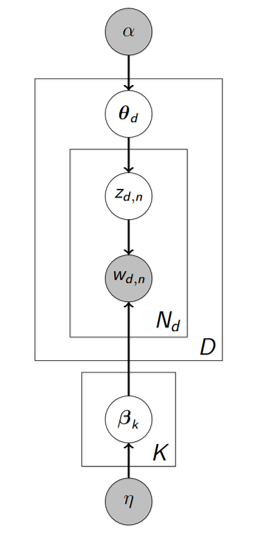

In [2]:
from IPython.display import Image
Image(filename='graphical_representation.png')

Let $N_d$ be the number of words in a document $d$, and $\alpha$ and $\eta$ prior hyperparameters each having a single value.

The data generating process of LDA is the following:

1. For topic $k=1, ..., K$ independently draw a distribution over words $\beta_k \sim Dirichlet(\eta)$.
2. For document $d=1, ..., D$ independently draw a distribution over topics $\theta_d \sim Dirichlet(\alpha)$.
3. For document $d=1, ..., D$:&nbsp;     
     &emsp; For word $n=1, ..., N_d$:&nbsp;     
     &emsp; &emsp; Draw a topic assignment $z_{n,d} \sim Multionimial(\theta_d)$, $z_{n,d} \in \{1, ..., K\}$.&nbsp;  
     &emsp; &emsp; Draw a word $w_{n,d} \sim Multionimial(\beta_{z_{n,d}})$, $w_{n,d} \in \{1, ..., V\}$.
     
The assumption regarding the exchangeability of words is unrealistic but useful. Imagine a document about unemployment where all the words are shuffled. By looking at words that are related to unemployment issue, it is still possible to grasp the topic of this text. 

The parameters of LDA $\theta_d$ and $\beta_k$ are random variables. The need for Bayesian formulation of the model is mainly explained by the large number of parameters we need to estimate.

Hyperparameters $\eta$ and $\alpha$ control sparsity of $\beta_k$ and $\theta_d$ respectively. As $\alpha$ gets smaller, fewer topics have high probability (all the rest get positive but close to zero probability). 

Given the statistical structure of LDA, the joint likelihood factors as follows:

$Pr(B,T,z,w|\alpha, \eta) = \prod_{k=1}^{K} Pr(\beta_k|\eta)\prod_{d=1}^{D} Pr(\theta_d|\alpha) (\prod_{n=1}^{N_d} Pr(w_{n,d}|\beta_{z_{n,d}})Pr(z_{n,d}|\theta_d))$, where

$B = (\beta_1, ..., \beta_K)$, $T = (\theta_1, ..., \theta_D)$, $z_d = (z_{1,d}, ..., z_{N_d, d})$, $z = (z_1, ..., z_D)$, $w = (w_1, ..., w_D)$.

The generating process for LDA assumes that we know all hidden variables (topic-specific vocabulary distributions $\beta_k$, document-specific topic prevalences $\theta_d$, and per-word topic assignments $z_{n,d}$ and observed variables (words $w_{n,d}$, hyperparameters $\alpha$ and $\eta$). However, in reality we need to infer latent variables $\beta_k, \theta_d$, and $z_{n,d}$ from the documents we have.

The posterior of interest is then $Pr(B, T, z |w,\alpha, \eta)$.

Both sampling-based algorithms and variational algorithms are used in practice to approximate the posterior of interest . Here we will use a collapsed Gibbs sampling algorithm.

The main idea behind this approach is that the conjugacy of the Dirichlet prior to multinomial distribution makes it possible to analytically integrate out the $B$ and $T$ parameters out of the joint distribution in $Pr(B,T,z,w|\alpha, \eta)$  and present the probability of the observed and unobserved variables as $Pr(z,w|\alpha, \eta)$.

As before, we are interested in the posterior $Pr(z|w, \alpha, \eta)$ because we do not observe topic assignments $z$. 

**Collapsed Gibbs sampling algorithm**

1. Randomly initialize the topic assignment variables $z$ to the values in $\{1,...,K\}$ by drawing $z_{n,d}$ from a uniform distribution. 

2. For document $d=1, ..., D$:&nbsp;     
     &emsp; For word $n=1, ..., N_d$:&nbsp;     
     &emsp; &emsp; Sequentially draw a new topic assignment $z_{n,d}$ via multinomial sampling based on all the 			updated topic assignments $z_{-(n,d)}$ using
     
    &emsp; &emsp; $P(z_{n,d} = k|z_{-(n,d)}, w, \alpha, \eta) \propto \frac{m_{v, -(n,d)}^{k}+\eta}{\sum_{v} m_{v, -(n,d)}^{k}+V\eta}* (m_{k, -n}^{d}+\alpha)$, where &nbsp;
    
    &emsp; &emsp; $m_{k, -n}^{d}$ is a count of words in document $d$ assigned to topic $k$ excluding the current assignment $z_{n,d}$;&nbsp;
    
    &emsp; &emsp; $m_{v, -(n,d)}^{k}$ is the number of times the word $w_{n,d}$ is assigned to topic $k$ in the entire corpus excluding the current assignment $z_{n,d}$.
    
    &emsp; &emsp; Intuitively, the probability of the current word $w_{n,d}$ being assigned to topic $k$ is higher if the word $w_{n,d}$ has a high probability under topic $k$ and if many other words in a document d are assigned to topic $k$. 
    
3. Repeat step 2 for iterations 2 to x (e.g., 2000) as a burn-in phase. 

4. Repeat step 2 for iterations x+1 to y (e.g. 2001 to 7000) and keep samples with a thinning interval of z (e.g., 50) to ensure that the autocorrelation between samples is low. 

For each stored sample it is possible to estimate topic-specific vocabulary distributions and document-specific topic proportions by using the following formulas:

$\hat{\theta_{d}^{k}} = \frac{m_{k}^{d}+\alpha}{\sum_{k=1}^{K}(m_{k}^{d}+\alpha)}$

$\hat{\beta_{k}^{v}} = \frac{m_{v}^{k}+\eta}{\sum_{v=1}^{V}(m_{k}^{v}+\eta)}$

$ Perplexity = exp\left(- \frac{\sum_{d=1}^{D}\sum_{v=1}^{V} n_{d,v} log(\sum_{k=1}^{K} \hat{\theta_{d}^{k}} \hat{\beta_{k}^{v}})}{\sum_{d=1}^{D} N_d}\right)$, 

where $n_{d,v}$ is a count of word $v$ in document $d$. A model that predicts the data well has a low perplexity.

Here we estimate LDA model using Stephen Hansen's [`topic-modelling-tools`](https://www.dropbox.com/s/gxkqgjwc50qjtg5/topic-modelling-tools-with_gsl.zip?dl=0). Where necessary we adjust the pre-processing steps to the needs of the current project.

In [3]:
import topicmodels

First, we need to pre-process the data. 

1. Create a single term for two-word (three-word) collocations. Please see further details in the notebook `Collocations.ipynb`.

2. Convert all upper-case to lower-case letters. 

3. Split contractions into constituent words (e.g., aren't => are not)

4. Tokenize a text. A token is the technical name for a sequence of characters that we want to treat as a group.

In [4]:
docsobj = topicmodels.RawDocs(data.texts, "long")

5. Remove non-alphabetic characters (numbers, punctuation, currency symbols etc.), but keep the words with the underscore because these are collocations.

In [5]:
docsobj.token_clean(1)

6. Remove stop words. Stop words are a set of very frequently used words that do not convey meaning by themselves, like ‘but’, ‘I’, ‘at’. 

In [6]:
docsobj.stopword_remove("tokens")
print docsobj.tokens[3]

[u'fresh', u'healthy', u'fresh', u'translates', u'healthy', u'restaurant', u'industry', u'sushi', u'npd', u'group', u'market', u'specialist', u'warren', u'solocheck', u'solecheck', u'will', u'presenting', u'custom', u'consumer', u'research', u'gsmc', u'attendees', u'thursday', u'presentation', u'will', u'focus', u'consumer', u'craveability', u'seafood_industry', u'can', u'build', u'craveability', u'menu', u'items', u'sushi', u'good', u'combination', u'freshness', u'craveability', u'freshness', u'add', u'something', u'different', u'flavor', u'profile', u'something', u'spicey', u'becomes', u'eating', u'something', u'fresh', u'unique', u'flavor', u'profile', u'john', u'fiorillo']


7. Remove names of IntraFish journalists that appear frequently in news articles as they may be considered stopwords.

In [7]:
docsobj.words_remove(docsobj.journalist_names)
print docsobj.tokens[3]

[u'fresh', u'healthy', u'fresh', u'translates', u'healthy', u'restaurant', u'industry', u'sushi', u'npd', u'group', u'market', u'specialist', u'warren', u'solocheck', u'solecheck', u'will', u'presenting', u'custom', u'consumer', u'research', u'gsmc', u'attendees', u'thursday', u'presentation', u'will', u'focus', u'consumer', u'craveability', u'seafood_industry', u'can', u'build', u'craveability', u'menu', u'items', u'sushi', u'good', u'combination', u'freshness', u'craveability', u'freshness', u'add', u'something', u'different', u'flavor', u'profile', u'something', u'spicey', u'becomes', u'eating', u'something', u'fresh', u'unique', u'flavor', u'profile']


8. Stem the tokens. Stemming is the process of reducing words that have different grammatical forms but share a common meaning to their word stem. For instance, all words ‘consist’, ‘consisted’, ‘consisting’ have the same stem ‘consist’. We use a Porter Stemmer for English language which is the most popular algorithm for stemming.

In [8]:
docsobj.stem()
print docsobj.stems[3]
docsobj.stopword_remove('stems')

[u'fresh', u'healthi', u'fresh', u'translat', u'healthi', u'restaur', u'industri', u'sushi', u'npd', u'group', u'market', u'specialist', u'warren', u'solocheck', u'solecheck', u'will', u'present', u'custom', u'consum', u'research', u'gsmc', u'attende', u'thursday', u'present', u'will', u'focu', u'consum', u'craveabl', u'seafood_industri', u'can', u'build', u'craveabl', u'menu', u'item', u'sushi', u'good', u'combin', u'fresh', u'craveabl', u'fresh', u'add', u'someth', u'differ', u'flavor', u'profil', u'someth', u'spicey', u'becom', u'eat', u'someth', u'fresh', u'uniqu', u'flavor', u'profil']


9. Discard the tokens with the lowest tf-idf score. tf-idf stands for term frequency – inverse document frequency and is defined by the following formula for each token $v$:

$$\text{tf-idf}_v = \log(1+N_v)× \log⁡\left(\frac{D}{D_v}\right)$$

where
$N_v$ – the count of the token $v$ in the corpus,
$D_v$ – the number of documents that contain the term $v$,
$D$ - the number of documents.

This numerical statistic is lower for those tokens that appear in the documents very rarely or very frequently. Dimensionality reduction is the main goal of the step. 

In [9]:
docsobj.term_rank("stems")

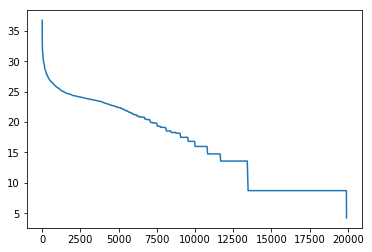

In [10]:
import matplotlib.pyplot as plt
plt.plot([x[1] for x in docsobj.tfidf_ranking])

In [11]:
docsobj.rank_remove("tfidf","stems",docsobj.tfidf_ranking[12500][1])
all_stems = [s for d in docsobj.stems for s in d]

In [12]:
print("number of unique stems = %d" % len(set(all_stems)))
print("number of total stems = %d" % len(all_stems))

number of unique stems = 11666
number of total stems = 804666


**Estimating LDA**

Initialize an LDA object using the LDA class. We pass a list of stems docsobj.stems as an input. The number of topics is 100.

In [13]:
ldaobj = topicmodels.LDA.LDAGibbs(docsobj.stems,100)

There are three attributes of ldaobj:
    
1. The number of topics, K.
2. Thy hyperparameter $\alpha$ for the Dirichlet prior of $\theta_d$, document-specific topic proportions.
3. Thy hyperparameter $\eta$ (beta) for the Dirichlet prior of $\beta_k$, topic-specific vocabulary distributions.

Griffits and Steyvers (2004):

$\alpha = 50/K$

$\eta = 200/V$


In [14]:
print ldaobj.K # number of topic, user defined.
print ldaobj.alpha # hyperparameter for document-topic distribution, automatically defined
print ldaobj.beta # hyperparameter for topics, automatically defined

100
0.5
0.0171438367907


Topic assignment variables $z$ are initialized randomly to the values in $\{1,...,K\}$ by drawing $z_{n,d}$ from a uniform distribution.

In [15]:
print ldaobj.topic_seed[:10]
print ldaobj.topic_seed.shape

[26 19 11 20  7 37 31  5  1 44]
(804666L,)


Now we are ready to sample.

500 is the number of burn-in iterations;
50 is a thinning interval;
150 is the number of samples to take.

In [16]:
from datetime import datetime #track time
startTime = datetime.now()
ldaobj.sample(500,50,150)
print datetime.now() - startTime

Iteration 1 of (collapsed) Gibbs sampling
Iteration 2 of (collapsed) Gibbs sampling
Iteration 3 of (collapsed) Gibbs sampling
Iteration 4 of (collapsed) Gibbs sampling
Iteration 5 of (collapsed) Gibbs sampling
Iteration 6 of (collapsed) Gibbs sampling
Iteration 7 of (collapsed) Gibbs sampling
Iteration 8 of (collapsed) Gibbs sampling
Iteration 9 of (collapsed) Gibbs sampling
Iteration 10 of (collapsed) Gibbs sampling
Iteration 11 of (collapsed) Gibbs sampling
Iteration 12 of (collapsed) Gibbs sampling
Iteration 13 of (collapsed) Gibbs sampling
Iteration 14 of (collapsed) Gibbs sampling
Iteration 15 of (collapsed) Gibbs sampling
Iteration 16 of (collapsed) Gibbs sampling
Iteration 17 of (collapsed) Gibbs sampling
Iteration 18 of (collapsed) Gibbs sampling
Iteration 19 of (collapsed) Gibbs sampling
Iteration 20 of (collapsed) Gibbs sampling
Iteration 21 of (collapsed) Gibbs sampling
Iteration 22 of (collapsed) Gibbs sampling
Iteration 23 of (collapsed) Gibbs sampling
Iteration 24 of (col

Iteration 225 of (collapsed) Gibbs sampling
Iteration 226 of (collapsed) Gibbs sampling
Iteration 227 of (collapsed) Gibbs sampling
Iteration 228 of (collapsed) Gibbs sampling
Iteration 229 of (collapsed) Gibbs sampling
Iteration 230 of (collapsed) Gibbs sampling
Iteration 231 of (collapsed) Gibbs sampling
Iteration 232 of (collapsed) Gibbs sampling
Iteration 233 of (collapsed) Gibbs sampling
Iteration 234 of (collapsed) Gibbs sampling
Iteration 235 of (collapsed) Gibbs sampling
Iteration 236 of (collapsed) Gibbs sampling
Iteration 237 of (collapsed) Gibbs sampling
Iteration 238 of (collapsed) Gibbs sampling
Iteration 239 of (collapsed) Gibbs sampling
Iteration 240 of (collapsed) Gibbs sampling
Iteration 241 of (collapsed) Gibbs sampling
Iteration 242 of (collapsed) Gibbs sampling
Iteration 243 of (collapsed) Gibbs sampling
Iteration 244 of (collapsed) Gibbs sampling
Iteration 245 of (collapsed) Gibbs sampling
Iteration 246 of (collapsed) Gibbs sampling
Iteration 247 of (collapsed) Gib

Iteration 439 of (collapsed) Gibbs sampling
Iteration 440 of (collapsed) Gibbs sampling
Iteration 441 of (collapsed) Gibbs sampling
Iteration 442 of (collapsed) Gibbs sampling
Iteration 443 of (collapsed) Gibbs sampling
Iteration 444 of (collapsed) Gibbs sampling
Iteration 445 of (collapsed) Gibbs sampling
Iteration 446 of (collapsed) Gibbs sampling
Iteration 447 of (collapsed) Gibbs sampling
Iteration 448 of (collapsed) Gibbs sampling
Iteration 449 of (collapsed) Gibbs sampling
Iteration 450 of (collapsed) Gibbs sampling
Iteration 451 of (collapsed) Gibbs sampling
Iteration 452 of (collapsed) Gibbs sampling
Iteration 453 of (collapsed) Gibbs sampling
Iteration 454 of (collapsed) Gibbs sampling
Iteration 455 of (collapsed) Gibbs sampling
Iteration 456 of (collapsed) Gibbs sampling
Iteration 457 of (collapsed) Gibbs sampling
Iteration 458 of (collapsed) Gibbs sampling
Iteration 459 of (collapsed) Gibbs sampling
Iteration 460 of (collapsed) Gibbs sampling
Iteration 461 of (collapsed) Gib

Iteration 640 of (collapsed) Gibbs sampling
Iteration 641 of (collapsed) Gibbs sampling
Iteration 642 of (collapsed) Gibbs sampling
Iteration 643 of (collapsed) Gibbs sampling
Iteration 644 of (collapsed) Gibbs sampling
Iteration 645 of (collapsed) Gibbs sampling
Iteration 646 of (collapsed) Gibbs sampling
Iteration 647 of (collapsed) Gibbs sampling
Iteration 648 of (collapsed) Gibbs sampling
Iteration 649 of (collapsed) Gibbs sampling
Iteration 650 of (collapsed) Gibbs sampling
Iteration 651 of (collapsed) Gibbs sampling
Iteration 652 of (collapsed) Gibbs sampling
Iteration 653 of (collapsed) Gibbs sampling
Iteration 654 of (collapsed) Gibbs sampling
Iteration 655 of (collapsed) Gibbs sampling
Iteration 656 of (collapsed) Gibbs sampling
Iteration 657 of (collapsed) Gibbs sampling
Iteration 658 of (collapsed) Gibbs sampling
Iteration 659 of (collapsed) Gibbs sampling
Iteration 660 of (collapsed) Gibbs sampling
Iteration 661 of (collapsed) Gibbs sampling
Iteration 662 of (collapsed) Gib

Iteration 830 of (collapsed) Gibbs sampling
Iteration 831 of (collapsed) Gibbs sampling
Iteration 832 of (collapsed) Gibbs sampling
Iteration 833 of (collapsed) Gibbs sampling
Iteration 834 of (collapsed) Gibbs sampling
Iteration 835 of (collapsed) Gibbs sampling
Iteration 836 of (collapsed) Gibbs sampling
Iteration 837 of (collapsed) Gibbs sampling
Iteration 838 of (collapsed) Gibbs sampling
Iteration 839 of (collapsed) Gibbs sampling
Iteration 840 of (collapsed) Gibbs sampling
Iteration 841 of (collapsed) Gibbs sampling
Iteration 842 of (collapsed) Gibbs sampling
Iteration 843 of (collapsed) Gibbs sampling
Iteration 844 of (collapsed) Gibbs sampling
Iteration 845 of (collapsed) Gibbs sampling
Iteration 846 of (collapsed) Gibbs sampling
Iteration 847 of (collapsed) Gibbs sampling
Iteration 848 of (collapsed) Gibbs sampling
Iteration 849 of (collapsed) Gibbs sampling
Iteration 850 of (collapsed) Gibbs sampling
Iteration 851 of (collapsed) Gibbs sampling
Iteration 852 of (collapsed) Gib

Iteration 1055 of (collapsed) Gibbs sampling
Iteration 1056 of (collapsed) Gibbs sampling
Iteration 1057 of (collapsed) Gibbs sampling
Iteration 1058 of (collapsed) Gibbs sampling
Iteration 1059 of (collapsed) Gibbs sampling
Iteration 1060 of (collapsed) Gibbs sampling
Iteration 1061 of (collapsed) Gibbs sampling
Iteration 1062 of (collapsed) Gibbs sampling
Iteration 1063 of (collapsed) Gibbs sampling
Iteration 1064 of (collapsed) Gibbs sampling
Iteration 1065 of (collapsed) Gibbs sampling
Iteration 1066 of (collapsed) Gibbs sampling
Iteration 1067 of (collapsed) Gibbs sampling
Iteration 1068 of (collapsed) Gibbs sampling
Iteration 1069 of (collapsed) Gibbs sampling
Iteration 1070 of (collapsed) Gibbs sampling
Iteration 1071 of (collapsed) Gibbs sampling
Iteration 1072 of (collapsed) Gibbs sampling
Iteration 1073 of (collapsed) Gibbs sampling
Iteration 1074 of (collapsed) Gibbs sampling
Iteration 1075 of (collapsed) Gibbs sampling
Iteration 1076 of (collapsed) Gibbs sampling
Iteration 

Iteration 1285 of (collapsed) Gibbs sampling
Iteration 1286 of (collapsed) Gibbs sampling
Iteration 1287 of (collapsed) Gibbs sampling
Iteration 1288 of (collapsed) Gibbs sampling
Iteration 1289 of (collapsed) Gibbs sampling
Iteration 1290 of (collapsed) Gibbs sampling
Iteration 1291 of (collapsed) Gibbs sampling
Iteration 1292 of (collapsed) Gibbs sampling
Iteration 1293 of (collapsed) Gibbs sampling
Iteration 1294 of (collapsed) Gibbs sampling
Iteration 1295 of (collapsed) Gibbs sampling
Iteration 1296 of (collapsed) Gibbs sampling
Iteration 1297 of (collapsed) Gibbs sampling
Iteration 1298 of (collapsed) Gibbs sampling
Iteration 1299 of (collapsed) Gibbs sampling
Iteration 1300 of (collapsed) Gibbs sampling
Iteration 1301 of (collapsed) Gibbs sampling
Iteration 1302 of (collapsed) Gibbs sampling
Iteration 1303 of (collapsed) Gibbs sampling
Iteration 1304 of (collapsed) Gibbs sampling
Iteration 1305 of (collapsed) Gibbs sampling
Iteration 1306 of (collapsed) Gibbs sampling
Iteration 

Iteration 1474 of (collapsed) Gibbs sampling
Iteration 1475 of (collapsed) Gibbs sampling
Iteration 1476 of (collapsed) Gibbs sampling
Iteration 1477 of (collapsed) Gibbs sampling
Iteration 1478 of (collapsed) Gibbs sampling
Iteration 1479 of (collapsed) Gibbs sampling
Iteration 1480 of (collapsed) Gibbs sampling
Iteration 1481 of (collapsed) Gibbs sampling
Iteration 1482 of (collapsed) Gibbs sampling
Iteration 1483 of (collapsed) Gibbs sampling
Iteration 1484 of (collapsed) Gibbs sampling
Iteration 1485 of (collapsed) Gibbs sampling
Iteration 1486 of (collapsed) Gibbs sampling
Iteration 1487 of (collapsed) Gibbs sampling
Iteration 1488 of (collapsed) Gibbs sampling
Iteration 1489 of (collapsed) Gibbs sampling
Iteration 1490 of (collapsed) Gibbs sampling
Iteration 1491 of (collapsed) Gibbs sampling
Iteration 1492 of (collapsed) Gibbs sampling
Iteration 1493 of (collapsed) Gibbs sampling
Iteration 1494 of (collapsed) Gibbs sampling
Iteration 1495 of (collapsed) Gibbs sampling
Iteration 

Iteration 1713 of (collapsed) Gibbs sampling
Iteration 1714 of (collapsed) Gibbs sampling
Iteration 1715 of (collapsed) Gibbs sampling
Iteration 1716 of (collapsed) Gibbs sampling
Iteration 1717 of (collapsed) Gibbs sampling
Iteration 1718 of (collapsed) Gibbs sampling
Iteration 1719 of (collapsed) Gibbs sampling
Iteration 1720 of (collapsed) Gibbs sampling
Iteration 1721 of (collapsed) Gibbs sampling
Iteration 1722 of (collapsed) Gibbs sampling
Iteration 1723 of (collapsed) Gibbs sampling
Iteration 1724 of (collapsed) Gibbs sampling
Iteration 1725 of (collapsed) Gibbs sampling
Iteration 1726 of (collapsed) Gibbs sampling
Iteration 1727 of (collapsed) Gibbs sampling
Iteration 1728 of (collapsed) Gibbs sampling
Iteration 1729 of (collapsed) Gibbs sampling
Iteration 1730 of (collapsed) Gibbs sampling
Iteration 1731 of (collapsed) Gibbs sampling
Iteration 1732 of (collapsed) Gibbs sampling
Iteration 1733 of (collapsed) Gibbs sampling
Iteration 1734 of (collapsed) Gibbs sampling
Iteration 

Iteration 1922 of (collapsed) Gibbs sampling
Iteration 1923 of (collapsed) Gibbs sampling
Iteration 1924 of (collapsed) Gibbs sampling
Iteration 1925 of (collapsed) Gibbs sampling
Iteration 1926 of (collapsed) Gibbs sampling
Iteration 1927 of (collapsed) Gibbs sampling
Iteration 1928 of (collapsed) Gibbs sampling
Iteration 1929 of (collapsed) Gibbs sampling
Iteration 1930 of (collapsed) Gibbs sampling
Iteration 1931 of (collapsed) Gibbs sampling
Iteration 1932 of (collapsed) Gibbs sampling
Iteration 1933 of (collapsed) Gibbs sampling
Iteration 1934 of (collapsed) Gibbs sampling
Iteration 1935 of (collapsed) Gibbs sampling
Iteration 1936 of (collapsed) Gibbs sampling
Iteration 1937 of (collapsed) Gibbs sampling
Iteration 1938 of (collapsed) Gibbs sampling
Iteration 1939 of (collapsed) Gibbs sampling
Iteration 1940 of (collapsed) Gibbs sampling
Iteration 1941 of (collapsed) Gibbs sampling
Iteration 1942 of (collapsed) Gibbs sampling
Iteration 1943 of (collapsed) Gibbs sampling
Iteration 

Iteration 2146 of (collapsed) Gibbs sampling
Iteration 2147 of (collapsed) Gibbs sampling
Iteration 2148 of (collapsed) Gibbs sampling
Iteration 2149 of (collapsed) Gibbs sampling
Iteration 2150 of (collapsed) Gibbs sampling
Iteration 2151 of (collapsed) Gibbs sampling
Iteration 2152 of (collapsed) Gibbs sampling
Iteration 2153 of (collapsed) Gibbs sampling
Iteration 2154 of (collapsed) Gibbs sampling
Iteration 2155 of (collapsed) Gibbs sampling
Iteration 2156 of (collapsed) Gibbs sampling
Iteration 2157 of (collapsed) Gibbs sampling
Iteration 2158 of (collapsed) Gibbs sampling
Iteration 2159 of (collapsed) Gibbs sampling
Iteration 2160 of (collapsed) Gibbs sampling
Iteration 2161 of (collapsed) Gibbs sampling
Iteration 2162 of (collapsed) Gibbs sampling
Iteration 2163 of (collapsed) Gibbs sampling
Iteration 2164 of (collapsed) Gibbs sampling
Iteration 2165 of (collapsed) Gibbs sampling
Iteration 2166 of (collapsed) Gibbs sampling
Iteration 2167 of (collapsed) Gibbs sampling
Iteration 

Iteration 2344 of (collapsed) Gibbs sampling
Iteration 2345 of (collapsed) Gibbs sampling
Iteration 2346 of (collapsed) Gibbs sampling
Iteration 2347 of (collapsed) Gibbs sampling
Iteration 2348 of (collapsed) Gibbs sampling
Iteration 2349 of (collapsed) Gibbs sampling
Iteration 2350 of (collapsed) Gibbs sampling
Iteration 2351 of (collapsed) Gibbs sampling
Iteration 2352 of (collapsed) Gibbs sampling
Iteration 2353 of (collapsed) Gibbs sampling
Iteration 2354 of (collapsed) Gibbs sampling
Iteration 2355 of (collapsed) Gibbs sampling
Iteration 2356 of (collapsed) Gibbs sampling
Iteration 2357 of (collapsed) Gibbs sampling
Iteration 2358 of (collapsed) Gibbs sampling
Iteration 2359 of (collapsed) Gibbs sampling
Iteration 2360 of (collapsed) Gibbs sampling
Iteration 2361 of (collapsed) Gibbs sampling
Iteration 2362 of (collapsed) Gibbs sampling
Iteration 2363 of (collapsed) Gibbs sampling
Iteration 2364 of (collapsed) Gibbs sampling
Iteration 2365 of (collapsed) Gibbs sampling
Iteration 

Iteration 2582 of (collapsed) Gibbs sampling
Iteration 2583 of (collapsed) Gibbs sampling
Iteration 2584 of (collapsed) Gibbs sampling
Iteration 2585 of (collapsed) Gibbs sampling
Iteration 2586 of (collapsed) Gibbs sampling
Iteration 2587 of (collapsed) Gibbs sampling
Iteration 2588 of (collapsed) Gibbs sampling
Iteration 2589 of (collapsed) Gibbs sampling
Iteration 2590 of (collapsed) Gibbs sampling
Iteration 2591 of (collapsed) Gibbs sampling
Iteration 2592 of (collapsed) Gibbs sampling
Iteration 2593 of (collapsed) Gibbs sampling
Iteration 2594 of (collapsed) Gibbs sampling
Iteration 2595 of (collapsed) Gibbs sampling
Iteration 2596 of (collapsed) Gibbs sampling
Iteration 2597 of (collapsed) Gibbs sampling
Iteration 2598 of (collapsed) Gibbs sampling
Iteration 2599 of (collapsed) Gibbs sampling
Iteration 2600 of (collapsed) Gibbs sampling
Iteration 2601 of (collapsed) Gibbs sampling
Iteration 2602 of (collapsed) Gibbs sampling
Iteration 2603 of (collapsed) Gibbs sampling
Iteration 

Iteration 2822 of (collapsed) Gibbs sampling
Iteration 2823 of (collapsed) Gibbs sampling
Iteration 2824 of (collapsed) Gibbs sampling
Iteration 2825 of (collapsed) Gibbs sampling
Iteration 2826 of (collapsed) Gibbs sampling
Iteration 2827 of (collapsed) Gibbs sampling
Iteration 2828 of (collapsed) Gibbs sampling
Iteration 2829 of (collapsed) Gibbs sampling
Iteration 2830 of (collapsed) Gibbs sampling
Iteration 2831 of (collapsed) Gibbs sampling
Iteration 2832 of (collapsed) Gibbs sampling
Iteration 2833 of (collapsed) Gibbs sampling
Iteration 2834 of (collapsed) Gibbs sampling
Iteration 2835 of (collapsed) Gibbs sampling
Iteration 2836 of (collapsed) Gibbs sampling
Iteration 2837 of (collapsed) Gibbs sampling
Iteration 2838 of (collapsed) Gibbs sampling
Iteration 2839 of (collapsed) Gibbs sampling
Iteration 2840 of (collapsed) Gibbs sampling
Iteration 2841 of (collapsed) Gibbs sampling
Iteration 2842 of (collapsed) Gibbs sampling
Iteration 2843 of (collapsed) Gibbs sampling
Iteration 

Iteration 3005 of (collapsed) Gibbs sampling
Iteration 3006 of (collapsed) Gibbs sampling
Iteration 3007 of (collapsed) Gibbs sampling
Iteration 3008 of (collapsed) Gibbs sampling
Iteration 3009 of (collapsed) Gibbs sampling
Iteration 3010 of (collapsed) Gibbs sampling
Iteration 3011 of (collapsed) Gibbs sampling
Iteration 3012 of (collapsed) Gibbs sampling
Iteration 3013 of (collapsed) Gibbs sampling
Iteration 3014 of (collapsed) Gibbs sampling
Iteration 3015 of (collapsed) Gibbs sampling
Iteration 3016 of (collapsed) Gibbs sampling
Iteration 3017 of (collapsed) Gibbs sampling
Iteration 3018 of (collapsed) Gibbs sampling
Iteration 3019 of (collapsed) Gibbs sampling
Iteration 3020 of (collapsed) Gibbs sampling
Iteration 3021 of (collapsed) Gibbs sampling
Iteration 3022 of (collapsed) Gibbs sampling
Iteration 3023 of (collapsed) Gibbs sampling
Iteration 3024 of (collapsed) Gibbs sampling
Iteration 3025 of (collapsed) Gibbs sampling
Iteration 3026 of (collapsed) Gibbs sampling
Iteration 

Iteration 3278 of (collapsed) Gibbs sampling
Iteration 3279 of (collapsed) Gibbs sampling
Iteration 3280 of (collapsed) Gibbs sampling
Iteration 3281 of (collapsed) Gibbs sampling
Iteration 3282 of (collapsed) Gibbs sampling
Iteration 3283 of (collapsed) Gibbs sampling
Iteration 3284 of (collapsed) Gibbs sampling
Iteration 3285 of (collapsed) Gibbs sampling
Iteration 3286 of (collapsed) Gibbs sampling
Iteration 3287 of (collapsed) Gibbs sampling
Iteration 3288 of (collapsed) Gibbs sampling
Iteration 3289 of (collapsed) Gibbs sampling
Iteration 3290 of (collapsed) Gibbs sampling
Iteration 3291 of (collapsed) Gibbs sampling
Iteration 3292 of (collapsed) Gibbs sampling
Iteration 3293 of (collapsed) Gibbs sampling
Iteration 3294 of (collapsed) Gibbs sampling
Iteration 3295 of (collapsed) Gibbs sampling
Iteration 3296 of (collapsed) Gibbs sampling
Iteration 3297 of (collapsed) Gibbs sampling
Iteration 3298 of (collapsed) Gibbs sampling
Iteration 3299 of (collapsed) Gibbs sampling
Iteration 

Iteration 3508 of (collapsed) Gibbs sampling
Iteration 3509 of (collapsed) Gibbs sampling
Iteration 3510 of (collapsed) Gibbs sampling
Iteration 3511 of (collapsed) Gibbs sampling
Iteration 3512 of (collapsed) Gibbs sampling
Iteration 3513 of (collapsed) Gibbs sampling
Iteration 3514 of (collapsed) Gibbs sampling
Iteration 3515 of (collapsed) Gibbs sampling
Iteration 3516 of (collapsed) Gibbs sampling
Iteration 3517 of (collapsed) Gibbs sampling
Iteration 3518 of (collapsed) Gibbs sampling
Iteration 3519 of (collapsed) Gibbs sampling
Iteration 3520 of (collapsed) Gibbs sampling
Iteration 3521 of (collapsed) Gibbs sampling
Iteration 3522 of (collapsed) Gibbs sampling
Iteration 3523 of (collapsed) Gibbs sampling
Iteration 3524 of (collapsed) Gibbs sampling
Iteration 3525 of (collapsed) Gibbs sampling
Iteration 3526 of (collapsed) Gibbs sampling
Iteration 3527 of (collapsed) Gibbs sampling
Iteration 3528 of (collapsed) Gibbs sampling
Iteration 3529 of (collapsed) Gibbs sampling
Iteration 

Iteration 3781 of (collapsed) Gibbs sampling
Iteration 3782 of (collapsed) Gibbs sampling
Iteration 3783 of (collapsed) Gibbs sampling
Iteration 3784 of (collapsed) Gibbs sampling
Iteration 3785 of (collapsed) Gibbs sampling
Iteration 3786 of (collapsed) Gibbs sampling
Iteration 3787 of (collapsed) Gibbs sampling
Iteration 3788 of (collapsed) Gibbs sampling
Iteration 3789 of (collapsed) Gibbs sampling
Iteration 3790 of (collapsed) Gibbs sampling
Iteration 3791 of (collapsed) Gibbs sampling
Iteration 3792 of (collapsed) Gibbs sampling
Iteration 3793 of (collapsed) Gibbs sampling
Iteration 3794 of (collapsed) Gibbs sampling
Iteration 3795 of (collapsed) Gibbs sampling
Iteration 3796 of (collapsed) Gibbs sampling
Iteration 3797 of (collapsed) Gibbs sampling
Iteration 3798 of (collapsed) Gibbs sampling
Iteration 3799 of (collapsed) Gibbs sampling
Iteration 3800 of (collapsed) Gibbs sampling
Iteration 3801 of (collapsed) Gibbs sampling
Iteration 3802 of (collapsed) Gibbs sampling
Iteration 

Iteration 4006 of (collapsed) Gibbs sampling
Iteration 4007 of (collapsed) Gibbs sampling
Iteration 4008 of (collapsed) Gibbs sampling
Iteration 4009 of (collapsed) Gibbs sampling
Iteration 4010 of (collapsed) Gibbs sampling
Iteration 4011 of (collapsed) Gibbs sampling
Iteration 4012 of (collapsed) Gibbs sampling
Iteration 4013 of (collapsed) Gibbs sampling
Iteration 4014 of (collapsed) Gibbs sampling
Iteration 4015 of (collapsed) Gibbs sampling
Iteration 4016 of (collapsed) Gibbs sampling
Iteration 4017 of (collapsed) Gibbs sampling
Iteration 4018 of (collapsed) Gibbs sampling
Iteration 4019 of (collapsed) Gibbs sampling
Iteration 4020 of (collapsed) Gibbs sampling
Iteration 4021 of (collapsed) Gibbs sampling
Iteration 4022 of (collapsed) Gibbs sampling
Iteration 4023 of (collapsed) Gibbs sampling
Iteration 4024 of (collapsed) Gibbs sampling
Iteration 4025 of (collapsed) Gibbs sampling
Iteration 4026 of (collapsed) Gibbs sampling
Iteration 4027 of (collapsed) Gibbs sampling
Iteration 

Iteration 4197 of (collapsed) Gibbs sampling
Iteration 4198 of (collapsed) Gibbs sampling
Iteration 4199 of (collapsed) Gibbs sampling
Iteration 4200 of (collapsed) Gibbs sampling
Iteration 4201 of (collapsed) Gibbs sampling
Iteration 4202 of (collapsed) Gibbs sampling
Iteration 4203 of (collapsed) Gibbs sampling
Iteration 4204 of (collapsed) Gibbs sampling
Iteration 4205 of (collapsed) Gibbs sampling
Iteration 4206 of (collapsed) Gibbs sampling
Iteration 4207 of (collapsed) Gibbs sampling
Iteration 4208 of (collapsed) Gibbs sampling
Iteration 4209 of (collapsed) Gibbs sampling
Iteration 4210 of (collapsed) Gibbs sampling
Iteration 4211 of (collapsed) Gibbs sampling
Iteration 4212 of (collapsed) Gibbs sampling
Iteration 4213 of (collapsed) Gibbs sampling
Iteration 4214 of (collapsed) Gibbs sampling
Iteration 4215 of (collapsed) Gibbs sampling
Iteration 4216 of (collapsed) Gibbs sampling
Iteration 4217 of (collapsed) Gibbs sampling
Iteration 4218 of (collapsed) Gibbs sampling
Iteration 

Iteration 4407 of (collapsed) Gibbs sampling
Iteration 4408 of (collapsed) Gibbs sampling
Iteration 4409 of (collapsed) Gibbs sampling
Iteration 4410 of (collapsed) Gibbs sampling
Iteration 4411 of (collapsed) Gibbs sampling
Iteration 4412 of (collapsed) Gibbs sampling
Iteration 4413 of (collapsed) Gibbs sampling
Iteration 4414 of (collapsed) Gibbs sampling
Iteration 4415 of (collapsed) Gibbs sampling
Iteration 4416 of (collapsed) Gibbs sampling
Iteration 4417 of (collapsed) Gibbs sampling
Iteration 4418 of (collapsed) Gibbs sampling
Iteration 4419 of (collapsed) Gibbs sampling
Iteration 4420 of (collapsed) Gibbs sampling
Iteration 4421 of (collapsed) Gibbs sampling
Iteration 4422 of (collapsed) Gibbs sampling
Iteration 4423 of (collapsed) Gibbs sampling
Iteration 4424 of (collapsed) Gibbs sampling
Iteration 4425 of (collapsed) Gibbs sampling
Iteration 4426 of (collapsed) Gibbs sampling
Iteration 4427 of (collapsed) Gibbs sampling
Iteration 4428 of (collapsed) Gibbs sampling
Iteration 

Iteration 4602 of (collapsed) Gibbs sampling
Iteration 4603 of (collapsed) Gibbs sampling
Iteration 4604 of (collapsed) Gibbs sampling
Iteration 4605 of (collapsed) Gibbs sampling
Iteration 4606 of (collapsed) Gibbs sampling
Iteration 4607 of (collapsed) Gibbs sampling
Iteration 4608 of (collapsed) Gibbs sampling
Iteration 4609 of (collapsed) Gibbs sampling
Iteration 4610 of (collapsed) Gibbs sampling
Iteration 4611 of (collapsed) Gibbs sampling
Iteration 4612 of (collapsed) Gibbs sampling
Iteration 4613 of (collapsed) Gibbs sampling
Iteration 4614 of (collapsed) Gibbs sampling
Iteration 4615 of (collapsed) Gibbs sampling
Iteration 4616 of (collapsed) Gibbs sampling
Iteration 4617 of (collapsed) Gibbs sampling
Iteration 4618 of (collapsed) Gibbs sampling
Iteration 4619 of (collapsed) Gibbs sampling
Iteration 4620 of (collapsed) Gibbs sampling
Iteration 4621 of (collapsed) Gibbs sampling
Iteration 4622 of (collapsed) Gibbs sampling
Iteration 4623 of (collapsed) Gibbs sampling
Iteration 

Iteration 4794 of (collapsed) Gibbs sampling
Iteration 4795 of (collapsed) Gibbs sampling
Iteration 4796 of (collapsed) Gibbs sampling
Iteration 4797 of (collapsed) Gibbs sampling
Iteration 4798 of (collapsed) Gibbs sampling
Iteration 4799 of (collapsed) Gibbs sampling
Iteration 4800 of (collapsed) Gibbs sampling
Iteration 4801 of (collapsed) Gibbs sampling
Iteration 4802 of (collapsed) Gibbs sampling
Iteration 4803 of (collapsed) Gibbs sampling
Iteration 4804 of (collapsed) Gibbs sampling
Iteration 4805 of (collapsed) Gibbs sampling
Iteration 4806 of (collapsed) Gibbs sampling
Iteration 4807 of (collapsed) Gibbs sampling
Iteration 4808 of (collapsed) Gibbs sampling
Iteration 4809 of (collapsed) Gibbs sampling
Iteration 4810 of (collapsed) Gibbs sampling
Iteration 4811 of (collapsed) Gibbs sampling
Iteration 4812 of (collapsed) Gibbs sampling
Iteration 4813 of (collapsed) Gibbs sampling
Iteration 4814 of (collapsed) Gibbs sampling
Iteration 4815 of (collapsed) Gibbs sampling
Iteration 

Iteration 5012 of (collapsed) Gibbs sampling
Iteration 5013 of (collapsed) Gibbs sampling
Iteration 5014 of (collapsed) Gibbs sampling
Iteration 5015 of (collapsed) Gibbs sampling
Iteration 5016 of (collapsed) Gibbs sampling
Iteration 5017 of (collapsed) Gibbs sampling
Iteration 5018 of (collapsed) Gibbs sampling
Iteration 5019 of (collapsed) Gibbs sampling
Iteration 5020 of (collapsed) Gibbs sampling
Iteration 5021 of (collapsed) Gibbs sampling
Iteration 5022 of (collapsed) Gibbs sampling
Iteration 5023 of (collapsed) Gibbs sampling
Iteration 5024 of (collapsed) Gibbs sampling
Iteration 5025 of (collapsed) Gibbs sampling
Iteration 5026 of (collapsed) Gibbs sampling
Iteration 5027 of (collapsed) Gibbs sampling
Iteration 5028 of (collapsed) Gibbs sampling
Iteration 5029 of (collapsed) Gibbs sampling
Iteration 5030 of (collapsed) Gibbs sampling
Iteration 5031 of (collapsed) Gibbs sampling
Iteration 5032 of (collapsed) Gibbs sampling
Iteration 5033 of (collapsed) Gibbs sampling
Iteration 

Iteration 5218 of (collapsed) Gibbs sampling
Iteration 5219 of (collapsed) Gibbs sampling
Iteration 5220 of (collapsed) Gibbs sampling
Iteration 5221 of (collapsed) Gibbs sampling
Iteration 5222 of (collapsed) Gibbs sampling
Iteration 5223 of (collapsed) Gibbs sampling
Iteration 5224 of (collapsed) Gibbs sampling
Iteration 5225 of (collapsed) Gibbs sampling
Iteration 5226 of (collapsed) Gibbs sampling
Iteration 5227 of (collapsed) Gibbs sampling
Iteration 5228 of (collapsed) Gibbs sampling
Iteration 5229 of (collapsed) Gibbs sampling
Iteration 5230 of (collapsed) Gibbs sampling
Iteration 5231 of (collapsed) Gibbs sampling
Iteration 5232 of (collapsed) Gibbs sampling
Iteration 5233 of (collapsed) Gibbs sampling
Iteration 5234 of (collapsed) Gibbs sampling
Iteration 5235 of (collapsed) Gibbs sampling
Iteration 5236 of (collapsed) Gibbs sampling
Iteration 5237 of (collapsed) Gibbs sampling
Iteration 5238 of (collapsed) Gibbs sampling
Iteration 5239 of (collapsed) Gibbs sampling
Iteration 

Iteration 5412 of (collapsed) Gibbs sampling
Iteration 5413 of (collapsed) Gibbs sampling
Iteration 5414 of (collapsed) Gibbs sampling
Iteration 5415 of (collapsed) Gibbs sampling
Iteration 5416 of (collapsed) Gibbs sampling
Iteration 5417 of (collapsed) Gibbs sampling
Iteration 5418 of (collapsed) Gibbs sampling
Iteration 5419 of (collapsed) Gibbs sampling
Iteration 5420 of (collapsed) Gibbs sampling
Iteration 5421 of (collapsed) Gibbs sampling
Iteration 5422 of (collapsed) Gibbs sampling
Iteration 5423 of (collapsed) Gibbs sampling
Iteration 5424 of (collapsed) Gibbs sampling
Iteration 5425 of (collapsed) Gibbs sampling
Iteration 5426 of (collapsed) Gibbs sampling
Iteration 5427 of (collapsed) Gibbs sampling
Iteration 5428 of (collapsed) Gibbs sampling
Iteration 5429 of (collapsed) Gibbs sampling
Iteration 5430 of (collapsed) Gibbs sampling
Iteration 5431 of (collapsed) Gibbs sampling
Iteration 5432 of (collapsed) Gibbs sampling
Iteration 5433 of (collapsed) Gibbs sampling
Iteration 

Iteration 5671 of (collapsed) Gibbs sampling
Iteration 5672 of (collapsed) Gibbs sampling
Iteration 5673 of (collapsed) Gibbs sampling
Iteration 5674 of (collapsed) Gibbs sampling
Iteration 5675 of (collapsed) Gibbs sampling
Iteration 5676 of (collapsed) Gibbs sampling
Iteration 5677 of (collapsed) Gibbs sampling
Iteration 5678 of (collapsed) Gibbs sampling
Iteration 5679 of (collapsed) Gibbs sampling
Iteration 5680 of (collapsed) Gibbs sampling
Iteration 5681 of (collapsed) Gibbs sampling
Iteration 5682 of (collapsed) Gibbs sampling
Iteration 5683 of (collapsed) Gibbs sampling
Iteration 5684 of (collapsed) Gibbs sampling
Iteration 5685 of (collapsed) Gibbs sampling
Iteration 5686 of (collapsed) Gibbs sampling
Iteration 5687 of (collapsed) Gibbs sampling
Iteration 5688 of (collapsed) Gibbs sampling
Iteration 5689 of (collapsed) Gibbs sampling
Iteration 5690 of (collapsed) Gibbs sampling
Iteration 5691 of (collapsed) Gibbs sampling
Iteration 5692 of (collapsed) Gibbs sampling
Iteration 

Iteration 5969 of (collapsed) Gibbs sampling
Iteration 5970 of (collapsed) Gibbs sampling
Iteration 5971 of (collapsed) Gibbs sampling
Iteration 5972 of (collapsed) Gibbs sampling
Iteration 5973 of (collapsed) Gibbs sampling
Iteration 5974 of (collapsed) Gibbs sampling
Iteration 5975 of (collapsed) Gibbs sampling
Iteration 5976 of (collapsed) Gibbs sampling
Iteration 5977 of (collapsed) Gibbs sampling
Iteration 5978 of (collapsed) Gibbs sampling
Iteration 5979 of (collapsed) Gibbs sampling
Iteration 5980 of (collapsed) Gibbs sampling
Iteration 5981 of (collapsed) Gibbs sampling
Iteration 5982 of (collapsed) Gibbs sampling
Iteration 5983 of (collapsed) Gibbs sampling
Iteration 5984 of (collapsed) Gibbs sampling
Iteration 5985 of (collapsed) Gibbs sampling
Iteration 5986 of (collapsed) Gibbs sampling
Iteration 5987 of (collapsed) Gibbs sampling
Iteration 5988 of (collapsed) Gibbs sampling
Iteration 5989 of (collapsed) Gibbs sampling
Iteration 5990 of (collapsed) Gibbs sampling
Iteration 

Iteration 6200 of (collapsed) Gibbs sampling
Iteration 6201 of (collapsed) Gibbs sampling
Iteration 6202 of (collapsed) Gibbs sampling
Iteration 6203 of (collapsed) Gibbs sampling
Iteration 6204 of (collapsed) Gibbs sampling
Iteration 6205 of (collapsed) Gibbs sampling
Iteration 6206 of (collapsed) Gibbs sampling
Iteration 6207 of (collapsed) Gibbs sampling
Iteration 6208 of (collapsed) Gibbs sampling
Iteration 6209 of (collapsed) Gibbs sampling
Iteration 6210 of (collapsed) Gibbs sampling
Iteration 6211 of (collapsed) Gibbs sampling
Iteration 6212 of (collapsed) Gibbs sampling
Iteration 6213 of (collapsed) Gibbs sampling
Iteration 6214 of (collapsed) Gibbs sampling
Iteration 6215 of (collapsed) Gibbs sampling
Iteration 6216 of (collapsed) Gibbs sampling
Iteration 6217 of (collapsed) Gibbs sampling
Iteration 6218 of (collapsed) Gibbs sampling
Iteration 6219 of (collapsed) Gibbs sampling
Iteration 6220 of (collapsed) Gibbs sampling
Iteration 6221 of (collapsed) Gibbs sampling
Iteration 

Iteration 6480 of (collapsed) Gibbs sampling
Iteration 6481 of (collapsed) Gibbs sampling
Iteration 6482 of (collapsed) Gibbs sampling
Iteration 6483 of (collapsed) Gibbs sampling
Iteration 6484 of (collapsed) Gibbs sampling
Iteration 6485 of (collapsed) Gibbs sampling
Iteration 6486 of (collapsed) Gibbs sampling
Iteration 6487 of (collapsed) Gibbs sampling
Iteration 6488 of (collapsed) Gibbs sampling
Iteration 6489 of (collapsed) Gibbs sampling
Iteration 6490 of (collapsed) Gibbs sampling
Iteration 6491 of (collapsed) Gibbs sampling
Iteration 6492 of (collapsed) Gibbs sampling
Iteration 6493 of (collapsed) Gibbs sampling
Iteration 6494 of (collapsed) Gibbs sampling
Iteration 6495 of (collapsed) Gibbs sampling
Iteration 6496 of (collapsed) Gibbs sampling
Iteration 6497 of (collapsed) Gibbs sampling
Iteration 6498 of (collapsed) Gibbs sampling
Iteration 6499 of (collapsed) Gibbs sampling
Iteration 6500 of (collapsed) Gibbs sampling
Iteration 6501 of (collapsed) Gibbs sampling
Iteration 

Iteration 6717 of (collapsed) Gibbs sampling
Iteration 6718 of (collapsed) Gibbs sampling
Iteration 6719 of (collapsed) Gibbs sampling
Iteration 6720 of (collapsed) Gibbs sampling
Iteration 6721 of (collapsed) Gibbs sampling
Iteration 6722 of (collapsed) Gibbs sampling
Iteration 6723 of (collapsed) Gibbs sampling
Iteration 6724 of (collapsed) Gibbs sampling
Iteration 6725 of (collapsed) Gibbs sampling
Iteration 6726 of (collapsed) Gibbs sampling
Iteration 6727 of (collapsed) Gibbs sampling
Iteration 6728 of (collapsed) Gibbs sampling
Iteration 6729 of (collapsed) Gibbs sampling
Iteration 6730 of (collapsed) Gibbs sampling
Iteration 6731 of (collapsed) Gibbs sampling
Iteration 6732 of (collapsed) Gibbs sampling
Iteration 6733 of (collapsed) Gibbs sampling
Iteration 6734 of (collapsed) Gibbs sampling
Iteration 6735 of (collapsed) Gibbs sampling
Iteration 6736 of (collapsed) Gibbs sampling
Iteration 6737 of (collapsed) Gibbs sampling
Iteration 6738 of (collapsed) Gibbs sampling
Iteration 

Iteration 6938 of (collapsed) Gibbs sampling
Iteration 6939 of (collapsed) Gibbs sampling
Iteration 6940 of (collapsed) Gibbs sampling
Iteration 6941 of (collapsed) Gibbs sampling
Iteration 6942 of (collapsed) Gibbs sampling
Iteration 6943 of (collapsed) Gibbs sampling
Iteration 6944 of (collapsed) Gibbs sampling
Iteration 6945 of (collapsed) Gibbs sampling
Iteration 6946 of (collapsed) Gibbs sampling
Iteration 6947 of (collapsed) Gibbs sampling
Iteration 6948 of (collapsed) Gibbs sampling
Iteration 6949 of (collapsed) Gibbs sampling
Iteration 6950 of (collapsed) Gibbs sampling
Iteration 6951 of (collapsed) Gibbs sampling
Iteration 6952 of (collapsed) Gibbs sampling
Iteration 6953 of (collapsed) Gibbs sampling
Iteration 6954 of (collapsed) Gibbs sampling
Iteration 6955 of (collapsed) Gibbs sampling
Iteration 6956 of (collapsed) Gibbs sampling
Iteration 6957 of (collapsed) Gibbs sampling
Iteration 6958 of (collapsed) Gibbs sampling
Iteration 6959 of (collapsed) Gibbs sampling
Iteration 

Iteration 7185 of (collapsed) Gibbs sampling
Iteration 7186 of (collapsed) Gibbs sampling
Iteration 7187 of (collapsed) Gibbs sampling
Iteration 7188 of (collapsed) Gibbs sampling
Iteration 7189 of (collapsed) Gibbs sampling
Iteration 7190 of (collapsed) Gibbs sampling
Iteration 7191 of (collapsed) Gibbs sampling
Iteration 7192 of (collapsed) Gibbs sampling
Iteration 7193 of (collapsed) Gibbs sampling
Iteration 7194 of (collapsed) Gibbs sampling
Iteration 7195 of (collapsed) Gibbs sampling
Iteration 7196 of (collapsed) Gibbs sampling
Iteration 7197 of (collapsed) Gibbs sampling
Iteration 7198 of (collapsed) Gibbs sampling
Iteration 7199 of (collapsed) Gibbs sampling
Iteration 7200 of (collapsed) Gibbs sampling
Iteration 7201 of (collapsed) Gibbs sampling
Iteration 7202 of (collapsed) Gibbs sampling
Iteration 7203 of (collapsed) Gibbs sampling
Iteration 7204 of (collapsed) Gibbs sampling
Iteration 7205 of (collapsed) Gibbs sampling
Iteration 7206 of (collapsed) Gibbs sampling
Iteration 

Iteration 7453 of (collapsed) Gibbs sampling
Iteration 7454 of (collapsed) Gibbs sampling
Iteration 7455 of (collapsed) Gibbs sampling
Iteration 7456 of (collapsed) Gibbs sampling
Iteration 7457 of (collapsed) Gibbs sampling
Iteration 7458 of (collapsed) Gibbs sampling
Iteration 7459 of (collapsed) Gibbs sampling
Iteration 7460 of (collapsed) Gibbs sampling
Iteration 7461 of (collapsed) Gibbs sampling
Iteration 7462 of (collapsed) Gibbs sampling
Iteration 7463 of (collapsed) Gibbs sampling
Iteration 7464 of (collapsed) Gibbs sampling
Iteration 7465 of (collapsed) Gibbs sampling
Iteration 7466 of (collapsed) Gibbs sampling
Iteration 7467 of (collapsed) Gibbs sampling
Iteration 7468 of (collapsed) Gibbs sampling
Iteration 7469 of (collapsed) Gibbs sampling
Iteration 7470 of (collapsed) Gibbs sampling
Iteration 7471 of (collapsed) Gibbs sampling
Iteration 7472 of (collapsed) Gibbs sampling
Iteration 7473 of (collapsed) Gibbs sampling
Iteration 7474 of (collapsed) Gibbs sampling
Iteration 

Iteration 7716 of (collapsed) Gibbs sampling
Iteration 7717 of (collapsed) Gibbs sampling
Iteration 7718 of (collapsed) Gibbs sampling
Iteration 7719 of (collapsed) Gibbs sampling
Iteration 7720 of (collapsed) Gibbs sampling
Iteration 7721 of (collapsed) Gibbs sampling
Iteration 7722 of (collapsed) Gibbs sampling
Iteration 7723 of (collapsed) Gibbs sampling
Iteration 7724 of (collapsed) Gibbs sampling
Iteration 7725 of (collapsed) Gibbs sampling
Iteration 7726 of (collapsed) Gibbs sampling
Iteration 7727 of (collapsed) Gibbs sampling
Iteration 7728 of (collapsed) Gibbs sampling
Iteration 7729 of (collapsed) Gibbs sampling
Iteration 7730 of (collapsed) Gibbs sampling
Iteration 7731 of (collapsed) Gibbs sampling
Iteration 7732 of (collapsed) Gibbs sampling
Iteration 7733 of (collapsed) Gibbs sampling
Iteration 7734 of (collapsed) Gibbs sampling
Iteration 7735 of (collapsed) Gibbs sampling
Iteration 7736 of (collapsed) Gibbs sampling
Iteration 7737 of (collapsed) Gibbs sampling
Iteration 

Iteration 7983 of (collapsed) Gibbs sampling
Iteration 7984 of (collapsed) Gibbs sampling
Iteration 7985 of (collapsed) Gibbs sampling
Iteration 7986 of (collapsed) Gibbs sampling
Iteration 7987 of (collapsed) Gibbs sampling
Iteration 7988 of (collapsed) Gibbs sampling
Iteration 7989 of (collapsed) Gibbs sampling
Iteration 7990 of (collapsed) Gibbs sampling
Iteration 7991 of (collapsed) Gibbs sampling
Iteration 7992 of (collapsed) Gibbs sampling
Iteration 7993 of (collapsed) Gibbs sampling
Iteration 7994 of (collapsed) Gibbs sampling
Iteration 7995 of (collapsed) Gibbs sampling
Iteration 7996 of (collapsed) Gibbs sampling
Iteration 7997 of (collapsed) Gibbs sampling
Iteration 7998 of (collapsed) Gibbs sampling
Iteration 7999 of (collapsed) Gibbs sampling
Iteration 8000 of (collapsed) Gibbs sampling
2:14:35.138000


We save perplexity corresponding to each iteration to see if the chain converges and decide when to stop sampling.

In [17]:
ldaobj.perplexity()

array([900.75529041, 898.92301234, 899.19965925, 897.80188793,
       897.0885546 , 896.64624936, 896.03491758, 895.0220599 ,
       896.01244945, 894.22053011, 893.94104192, 893.76597504,
       892.95916286, 892.64659058, 892.93105921, 892.21447066,
       892.36861448, 891.90764127, 892.40691903, 891.91763542,
       891.5808909 , 891.14205449, 890.70885181, 890.78487648,
       891.33985337, 890.89980957, 891.33402277, 891.18806732,
       891.59757808, 891.08500046, 890.83579934, 890.33269436,
       889.89730747, 890.48260109, 890.65431736, 890.24298386,
       889.75939185, 889.65052608, 890.0863277 , 891.19655097,
       890.89260802, 889.58922233, 890.26856276, 889.79625507,
       890.65066469, 890.63473886, 889.95757165, 889.90628723,
       889.50304692, 889.32049851, 890.26117771, 890.01740277,
       889.58339289, 889.14278869, 889.78024322, 889.89507362,
       889.55499966, 889.30607734, 889.84955195, 889.48191031,
       889.71475499, 890.32152244, 889.54751349, 889.21

Save perplexity to a variable `perplexity_to_save`.

In [18]:
perplexity_to_save = ldaobj.perplexity()

Plot perplexity to decide on the number of samples we keep.

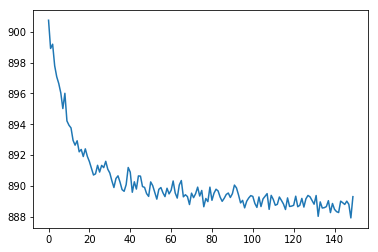

In [19]:
import matplotlib.pyplot as plt
plt.plot(perplexity_to_save)

Save perplexity to a csv file.

In [20]:
import numpy as np
np.savetxt("perplexity.csv", perplexity_to_save, delimiter =  ".", fmt='%10.8f')

We want to discard the first burn-in samples. `samples_keep` keeps the last n samples of the chain. We keep 80 samples where the chain has converged.

In [21]:
ldaobj.samples_keep(80)

Save the model to `finalized_model.sav` file to access it later.

In [22]:
from sklearn.externals import joblib
filename = os.getcwd() + '\\finalized_model.sav'
_ = joblib.dump(ldaobj, filename, compress=True)  

Here is how you can load the model.

In [23]:
from sklearn.externals import joblib
ldaobj = joblib.load('finalized_model.sav')

`topic_content(n)` method produces topic_description.csv file. The rows of this file contain the first `n` stems in each topic ranked according to their probability, using the final stored sample.

In [24]:
ldaobj.topic_content(100)

`dt_avg()` calculates an average of the matrices in `ldaobj.dt`. These are distributions of topics within each document. The result is saved in a dt.csv file.

In [25]:
dt = ldaobj.dt_avg()

`tt_avg()` calculates an average of the matrices in `ldaobj.tt`. These are average topics. The result is saved in a tt.csv file.

In [26]:
tt = ldaobj.tt_avg()
ldaobj.dict_print()

Now let's add the estimated document-specific topic distributions to our data set and save the data frame without the columns 'texts' and 'titles' to the file called `article_topic.csv`.

In [27]:
for i in xrange(ldaobj.K): data['T' + str(i)] = dt[:,i]
data.loc[:, ~data.columns.isin(['texts', 'titles'])].to_csv('article_topic.csv', encoding='utf-8')

## Daily topics

Now we collapse all articles for a particular day into one document, and then compute, using the estimated topic distributions, the topic frequencies for this newly formed document. We use 20 iterations in this re-sampling step.

In [28]:
startTime_1 = datetime.now()
# create a new column 'texts_cleaned' that contains a cleaned version of an original text
data['texts_cleaned'] = [' '.join(s) for s in docsobj.stems]
# aggregate up to the day level
aggtexts = data.groupby(['dates_day'])['texts_cleaned'].apply(lambda x: ' '.join(x))
# create a new RawDocs object that contains the complete stemmed content of the daily texts in aggdocs.tokens
aggdocs = topicmodels.RawDocs(aggtexts) 
# initialize query object with ldaobj attributes
queryobj = topicmodels.LDA.QueryGibbs(aggdocs.tokens, ldaobj.token_key, ldaobj.tt)
queryobj.query(20)
queryobj.perplexity()
dt_query = queryobj.dt_avg()
aggtexts = pd.DataFrame(dt_query, index=aggtexts.index, columns = ['T' + str(i) for i in xrange(queryobj.K)])
aggtexts.to_csv("daily_topics.csv")
print datetime.now() - startTime_1

Sample 0 queried
Sample 1 queried
Sample 2 queried
Sample 3 queried
Sample 4 queried
Sample 5 queried
Sample 6 queried
Sample 7 queried
Sample 8 queried
Sample 9 queried
Sample 10 queried
Sample 11 queried
Sample 12 queried
Sample 13 queried
Sample 14 queried
Sample 15 queried
Sample 16 queried
Sample 17 queried
Sample 18 queried
Sample 19 queried
Sample 20 queried
Sample 21 queried
Sample 22 queried
Sample 23 queried
Sample 24 queried
Sample 25 queried
Sample 26 queried
Sample 27 queried
Sample 28 queried
Sample 29 queried
Sample 30 queried
Sample 31 queried
Sample 32 queried
Sample 33 queried
Sample 34 queried
Sample 35 queried
Sample 36 queried
Sample 37 queried
Sample 38 queried
Sample 39 queried
Sample 40 queried
Sample 41 queried
Sample 42 queried
Sample 43 queried
Sample 44 queried
Sample 45 queried
Sample 46 queried
Sample 47 queried
Sample 48 queried
Sample 49 queried
Sample 50 queried
Sample 51 queried
Sample 52 queried
Sample 53 queried
Sample 54 queried
Sample 55 queried
Sa

## Our firms and competitors

Finally, we estimate daily topics based exclusively on articles that discuss either firms from the SPI index or their competitors. The `FindCompetitors` notebook is used to create binary indicators—`competitors` and `indexfirms`. The `competitors` indicator is set to 1 if an article mentions a competitor firm, while `indexfirms` is set to 1 if the article mentions any of the firms from the SPI index.

In [29]:
data_our_comp = data[(data['indexfirms']==1) | (data['competitors'] == 1)]

In [30]:
startTime_2 = datetime.now()
aggtexts = data_our_comp.groupby(['dates_day'])['texts_cleaned'].apply(lambda x: ' '.join(x)) 
aggdocs = topicmodels.RawDocs(aggtexts) 
queryobj = topicmodels.LDA.QueryGibbs(aggdocs.tokens,ldaobj.token_key,ldaobj.tt)
queryobj.query(20)
queryobj.perplexity()
dt_query = queryobj.dt_avg()
aggtexts = pd.DataFrame(dt_query, index = aggtexts.index, columns=['T' + str(i) for i in xrange(queryobj.K)])
aggtexts.to_csv("daily_topics_our_comp.csv")
print datetime.now() - startTime_2

Sample 0 queried
Sample 1 queried
Sample 2 queried
Sample 3 queried
Sample 4 queried
Sample 5 queried
Sample 6 queried
Sample 7 queried
Sample 8 queried
Sample 9 queried
Sample 10 queried
Sample 11 queried
Sample 12 queried
Sample 13 queried
Sample 14 queried
Sample 15 queried
Sample 16 queried
Sample 17 queried
Sample 18 queried
Sample 19 queried
Sample 20 queried
Sample 21 queried
Sample 22 queried
Sample 23 queried
Sample 24 queried
Sample 25 queried
Sample 26 queried
Sample 27 queried
Sample 28 queried
Sample 29 queried
Sample 30 queried
Sample 31 queried
Sample 32 queried
Sample 33 queried
Sample 34 queried
Sample 35 queried
Sample 36 queried
Sample 37 queried
Sample 38 queried
Sample 39 queried
Sample 40 queried
Sample 41 queried
Sample 42 queried
Sample 43 queried
Sample 44 queried
Sample 45 queried
Sample 46 queried
Sample 47 queried
Sample 48 queried
Sample 49 queried
Sample 50 queried
Sample 51 queried
Sample 52 queried
Sample 53 queried
Sample 54 queried
Sample 55 queried
Sa